In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.metrics import confusion_matrix , classification_report, precision_recall_curve, roc_curve, roc_auc_score
from tensorflow.keras import datasets, layers, models
from keras.layers import SpatialDropout1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, precision_recall_curve, roc_curve, roc_auc_score

Using TensorFlow backend.


In [54]:
df=pd.read_excel('E:/SnehaWork/AIProject/Dataset/Big DS/Combined_Sheet_MODIFIED.xlsx')
df.columns[df.isnull().any()].tolist() 

['Churn Reason']

In [3]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [68]:
print_unique_col_values(df)

Latitude : [33.964131 34.059281 34.048013 ... 41.813521 39.191797 40.363446]
Longitude : [-118.272783 -118.30742  -118.293953 ... -121.492666 -120.212401
 -123.835041]
Under 30 : [0 1]
Senior Citizen : [0 1]
Partner : [0 1]
Number of Dependents : [0 2 3 1 5 4 6 7 8 9]
Number of Referrals : [ 0  6  1  4  5  2  3  7  9  8 10 11]
Tenure Months : [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72]
Satisfaction Score : [1 2 3 4 5]
Phone Service : [1 0]
Multiple Lines : [0 1]
Online Security : [1 0]
Online Backup : [1 0]
Device Protection : [0 1]
Tech Support : [0 1]
Premium Tech Support : [0 1]
Unlimited Data : [1 0]
Streaming Music : [0 1]
Streaming TV : [0 1]
Streaming Movies : [0 1]
Avg Monthly GB Download : [21 51 26 47 11 69  8  0 16 58 41 28 18 19 20 17 52 29 57 53 56 12 27 14
 30 71 48 22  3 24 73 76  9  7 15  2 10  5 

In [59]:
Churned = df[df['Churn Label'] == 'Yes']
NonChurned = df[df['Churn Label'] == 'No']

number_of_Churned = len(Churned)
number_of_NonChurned = len(NonChurned)

Churned_percentage = round((number_of_Churned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
valid_percentage = round((number_of_NonChurned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
print(number_of_NonChurned,number_of_Churned)
#df.columns.tolist()

KeyError: 'Churn Label'

In [57]:
#Unnecessary columns
drop_cols=['CustomerID','Count','Country','State','Age','Churn Label','Churn Reason','Churn Score','City','Lat Long']
df.drop(drop_cols,axis=1,inplace=True)

In [9]:
df.head()

,Zip Code,Latitude,Longitude,Age,Under 30,Senior Citizen,Gender,Partner,Number of Dependents,Number of Referrals,...,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Total Refunds,Total Extra Data Charges,Monthly Charges,Total Charges,Total Long Distance Charges,Total Revenue,CLTV,Churn Value
0,90003,33.964131,-118.272783,37,No,No,Male,No,0,0,...,21,10.47,0.0,0,53.85,108.15,20.94,129.09,3239,1
1,90005,34.059281,-118.307420,19,Yes,No,Female,No,2,0,...,51,9.12,0.0,0,70.70,151.65,18.24,169.89,2701,1
2,90006,34.048013,-118.293953,31,No,No,Female,No,2,0,...,26,12.15,0.0,0,99.65,820.5,97.20,917.70,5372,1
3,90010,34.062125,-118.315709,23,Yes,No,Female,Yes,3,0,...,47,4.89,0.0,0,104.80,3046.05,136.92,3182.97,5003,1
4,90015,34.039224,-118.266293,38,No,No,Male,No,1,0,...,11,44.33,0.0,0,103.70,5036.3,2172.17,7208.47,5340,1


In [60]:
#error='coerce' ignores the errors. Conversion for all except for error values i.e. empty spaces. 
#.isnull() gives columns which have empty spaces
#shows the data which has TotalCharges as null. Good to drop these
df.columns[df.isnull().any()].tolist() 
df[pd.to_numeric(df['Total Charges'],errors='coerce').isnull()].shape

(11, 36)

In [61]:
#Drop rows with TotalCharges as null

#df1 = df[df['Total Charges']!=' ']
df.drop(df[df['Total Charges'] == " "].index, axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [15]:
df.shape

(7032, 36)

In [62]:
df['Total Charges'] = df['Total Charges'].astype('float64')

In [63]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 48 columns):
Latitude                                    7032 non-null float64
Longitude                                   7032 non-null float64
Under 30                                    7032 non-null int64
Senior Citizen                              7032 non-null int64
Partner                                     7032 non-null int64
Number of Dependents                        7032 non-null int64
Number of Referrals                         7032 non-null int64
Tenure Months                               7032 non-null int64
Phone Service                               7032 non-null int64
Multiple Lines                              7032 non-null int64
Online Security                             7032 non-null int64
Online Backup                               7032 non-null int64
Device Protection                           7032 non-null int64
Tech Support                                7032 non-null

In [64]:
df['Under 30'] = df['Under 30'].astype(str)
df['Senior Citizen'] = df['Senior Citizen'].astype(str)

In [65]:
#cols_to_convert = ['Partner', 'Dependents', 'Phone Service', 'Paperless Billing']

#replace Yes/No to 1/0 since ML doesn't understand text

yes_no_columns = ['Under 30','Senior Citizen','Partner','Phone Service','Multiple Lines','Online Security','Online Backup','Device Protection',
'Tech Support','Premium Tech Support','Unlimited Data','Streaming Music','Streaming TV','Streaming Movies']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [66]:
df.shape

(7032, 36)

In [67]:
#columns with something other than numeric series where we don't know data. One hot encoding
df = pd.get_dummies(df.iloc[:, 1 :])
df.head()


,Latitude,Longitude,Under 30,Senior Citizen,Partner,Number of Dependents,Number of Referrals,Tenure Months,Satisfaction Score,Phone Service,...,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,33.964131,-118.272783,0,0,0,0,0,2,1,1,...,0,1,0,0,0,1,0,0,0,1
1,34.059281,-118.307420,1,0,0,2,0,2,2,1,...,0,1,0,0,0,1,0,0,1,0
2,34.048013,-118.293953,0,0,0,2,0,8,3,1,...,0,1,0,0,0,1,0,0,1,0
3,34.062125,-118.315709,1,0,1,3,0,28,3,1,...,0,1,0,0,0,1,0,0,1,0
4,34.039224,-118.266293,0,0,0,1,0,49,1,1,...,0,1,0,0,0,1,1,0,0,0


In [75]:
#df = pd.get_dummies(data=df,df['Satisfaction Score'])
multiclass_col=['Satisfaction Score']
df = pd.get_dummies(data=df,columns=multiclass_col)

In [77]:
#check for normal distribution

from scipy import stats

k=0
for i in df.columns:
  test=stats.shapiro(df[i])
  if (test[1]>0.05):
    k=k+1
    print('the p_value of ',i,' is ',test[1])
if k==0:
  print('variables not normally distributed because all p_values are smaller than 0.05')


variables not normally distributed because all p_values are smaller than 0.05


C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
#correlation value with abs and person parameter for better understanding of each feature
import seaborn as sns

#plt.figure(figsize=(10,5))
#fig, ax = plt.subplots(figsize=(15,15)) 
#sns.heatmap(df.corr()[['Churn Value']],cmap="RdBu_r",center=0.0, annot=True);
c=df.corr()[['Churn Value']].abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

Churn Value  Latitude                                    0.003600
             Longitude                                   0.004693
             Total Extra Data Charges                    0.006885
             Avg Monthly Long Distance Charges           0.007952
             Gender_Female                               0.008545
             Gender_Male                                 0.008545
             Phone Service                               0.011691
             Total Refunds                               0.033954
             Multiple Lines                              0.040033
             Streaming Music                             0.045107
             Avg Monthly GB Download                     0.048438
             Under 30                                    0.054300
             Streaming Movies                            0.060860
             Streaming TV                                0.063254
             Device Protection                           0.066193
          

In [81]:
#Drop churn 
X = df.drop('Churn Value',axis=1)  #check axis=0/1
Y = df['Churn Value']
Y.value_counts()

0    5163
1    1869
Name: Churn Value, dtype: int64

In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_pca=sc.fit_transform(X) 
model=PCA(n_components=15)
X_pca_comp=model.fit_transform(X_pca)

In [110]:
#X_pca_comp

In [83]:
pca_df=pd.DataFrame(X_pca_comp,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15'])
#pca_df=pd.DataFrame(X_pca_comp,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','pca26'])

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(pca_df,Y, train_size=0.70, random_state=42,stratify=Y)

In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train, Y_train = smote.fit_sample(X_train.astype('float'), Y_train.astype('float'))

In [86]:
#X_test.shape
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1], 1).astype('float32') 
X_test=X_test.values.reshape(X_test.shape[0],X_test.shape[1], 1).astype('float32')

In [87]:
X_train.shape

(7228, 15, 1)

In [99]:
cnn = models.Sequential([
    layers.Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X_train[0].shape)),  
    layers.MaxPooling1D(pool_size=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    
    layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Flatten(),

   layers.Dense(64,kernel_regularizer='l2',activation='relu'),
   layers.Dropout(0.5),
   layers.Dense(1,activation='sigmoid') 
])

#opt = tf.keras.optimizers.SGD(learning_rate=0.05)
#cnn.summary()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
            #metrics=['accuracy',f_score(study, compare and put it in report about which is better metrics for your model)],learning_rate= accuracy bumpy so reduce it 0.1-0.5)



In [100]:
history = cnn.fit(X_train, Y_train, epochs=100,validation_data=(X_test,Y_test),batch_size=50,callbacks=[early_stopping])


Train on 7228 samples, validate on 2110 samples
Epoch 1/100
7228/7228 [==============================] - 7s 974us/sample - loss: 1.1718 - accuracy: 0.6267 - val_loss: 0.9267 - val_accuracy: 0.7313
Epoch 2/100
7228/7228 [==============================] - 2s 297us/sample - loss: 0.7987 - accuracy: 0.7341 - val_loss: 0.6687 - val_accuracy: 0.8033
Epoch 3/100
7228/7228 [==============================] - 2s 282us/sample - loss: 0.6521 - accuracy: 0.7658 - val_loss: 0.5628 - val_accuracy: 0.8033
Epoch 4/100
7228/7228 [==============================] - 2s 277us/sample - loss: 0.5557 - accuracy: 0.7923 - val_loss: 0.4867 - val_accuracy: 0.8147
Epoch 5/100
7228/7228 [==============================] - 2s 273us/sample - loss: 0.5059 - accuracy: 0.7986 - val_loss: 0.4609 - val_accuracy: 0.8175
Epoch 6/100
7228/7228 [==============================] - 2s 267us/sample - loss: 0.4757 - accuracy: 0.8076 - val_loss: 0.4461 - val_accuracy: 0.8175
Epoch 7/100
7228/7228 [==============================] - 2

7228/7228 [==============================] - 2s 275us/sample - loss: 0.3723 - accuracy: 0.8419 - val_loss: 0.3439 - val_accuracy: 0.8488
Epoch 56/100
7228/7228 [==============================] - 2s 242us/sample - loss: 0.3712 - accuracy: 0.8449 - val_loss: 0.3299 - val_accuracy: 0.8621
Epoch 57/100
7228/7228 [==============================] - 2s 264us/sample - loss: 0.3770 - accuracy: 0.8413 - val_loss: 0.3281 - val_accuracy: 0.8607
Epoch 58/100
7228/7228 [==============================] - 2s 274us/sample - loss: 0.3713 - accuracy: 0.8427 - val_loss: 0.3347 - val_accuracy: 0.8583
Epoch 59/100
7228/7228 [==============================] - 2s 279us/sample - loss: 0.3809 - accuracy: 0.8354 - val_loss: 0.3225 - val_accuracy: 0.8630
Epoch 60/100
7228/7228 [==============================] - 2s 273us/sample - loss: 0.3670 - accuracy: 0.8460 - val_loss: 0.3538 - val_accuracy: 0.8450
Epoch 61/100
7228/7228 [==============================] - 2s 272us/sample - loss: 0.3765 - accuracy: 0.8380 - val

In [66]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy='minority')
#X_train, y_train = smote.fit_sample(X_train_tbc.astype('float'), y_train_tbc.astype('float'))

In [25]:
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify=y_train)

In [101]:
cnn.evaluate(X_test,Y_test,batch_size=50, verbose=0)
#cnn.result()


[0.29950519153292143, 0.86872035]

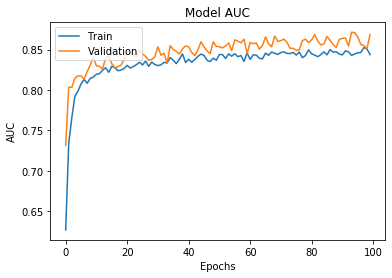

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model AUC')

plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [103]:
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Model AUC')

plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

KeyError: 'AUC'

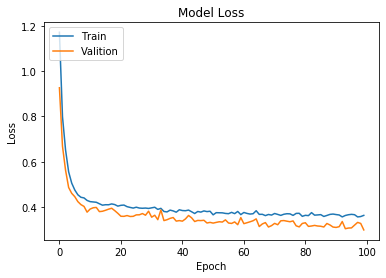

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valition'], loc='upper left')
plt.show()

In [105]:
#finidng prediction/probability of CNN model
yp= cnn.predict(X_test)

#y_pred = [1 if i > 0.2 else 0 for i in yp]
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1378,  171],
       [ 106,  455]])>

In [106]:
yp_pred = np.round(y_pred)
print("Classification Report: \n", classification_report(Y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1549
           1       0.73      0.81      0.77       561

    accuracy                           0.87      2110
   macro avg       0.83      0.85      0.84      2110
weighted avg       0.87      0.87      0.87      2110



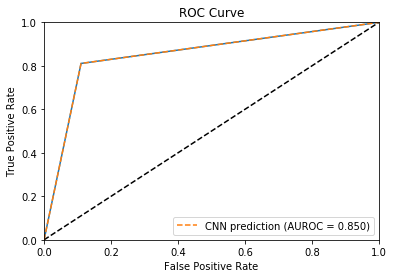

In [107]:
cnn_auc = roc_auc_score(Y_test, y_pred)

cnn_fpr, cnn_tpr, _ = roc_curve(Y_test, y_pred)

plt.plot(cnn_fpr, cnn_tpr)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(cnn_fpr, cnn_tpr, linestyle='--', label='CNN prediction (AUROC = %0.3f)' % cnn_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Text(0.5, 1.0, 'PR Curve')

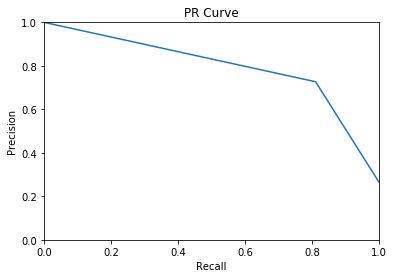

In [108]:
precision_test, recall_test, thresholds_test = precision_recall_curve(Y_test, y_pred)
plt.plot(recall_test, precision_test)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')